In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

In [4]:
df = pd.read_csv('Dataset01-Employee_Attrition.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
data = df.drop_duplicates()
data.shape

(11991, 10)

In [13]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [14]:
data['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

<Axes: >

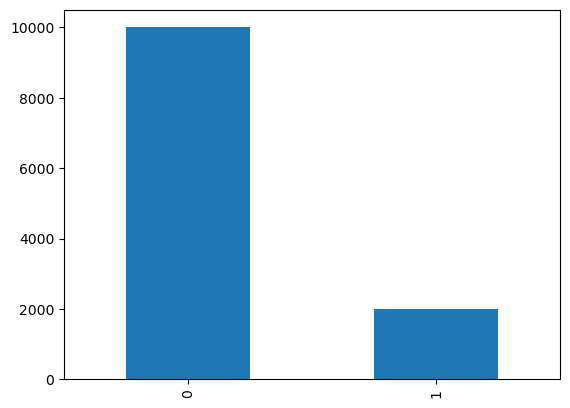

In [17]:
data['left'].value_counts().plot(kind = 'bar')

In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

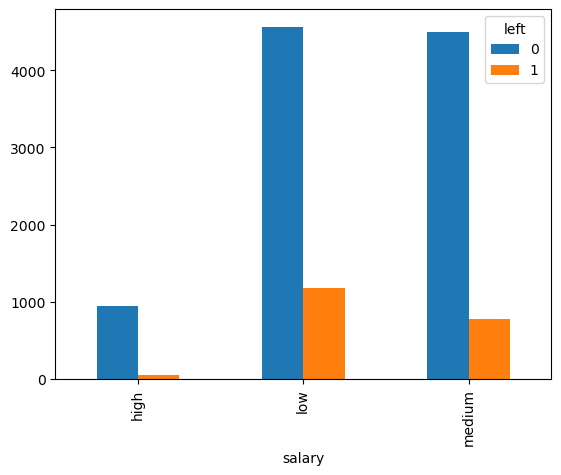

In [20]:
pd.crosstab(data['salary'], data['left']).plot(kind = 'bar')

<Axes: xlabel='Department'>

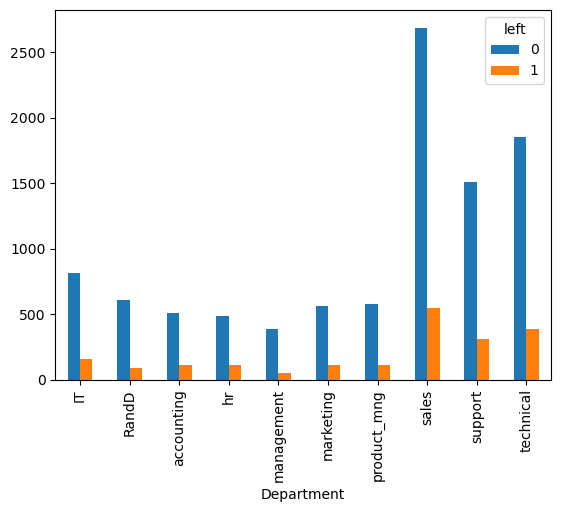

In [22]:
pd.crosstab(data['Department'], data['left']).plot(kind ='bar')

In [25]:
pd.crosstab(data['Department'], data['left'], margins=True, margins_name='sum')

left,0,1,sum
Department,,,
IT,818,158,976
RandD,609,85,694
accounting,512,109,621
hr,488,113,601
management,384,52,436
marketing,561,112,673
product_mng,576,110,686
sales,2689,550,3239
support,1509,312,1821


In [30]:
X = data.drop('left', axis=1)

In [31]:
X_num = X.select_dtypes(include='number')

In [32]:
X_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encdoer = LabelEncoder()

In [36]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [37]:
X['salary'] = label_encdoer.fit_transform(X['salary'])
X['Department']= label_encdoer.fit_transform(X['Department'])

In [38]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [39]:
y = data['left']

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [41]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled
X_test_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]])

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [50]:
y_pred = model.predict(X_test_scaled)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test, y_pred)

In [53]:
cm

array([[1991,    7],
       [  39,  362]], dtype=int64)

<Axes: >

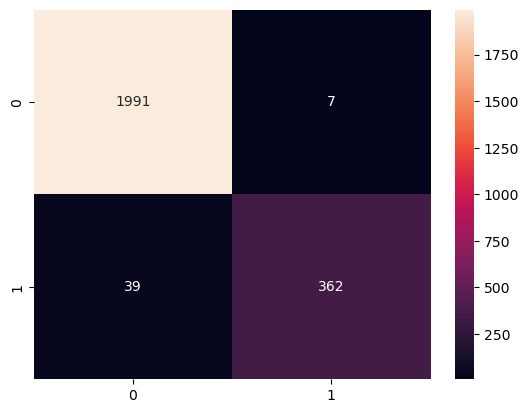

In [54]:
sns.heatmap(cm, annot=True, fmt = 'd')

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
model_accuracy =accuracy_score(y_test, y_pred)

In [57]:
print('Acuuracy: ', model_accuracy)

Acuuracy:  0.9808253438932889


In [59]:
model_precision = precision_score(y_test, y_pred)

In [60]:
print('Precision: ', model_precision)

Precision:  0.981029810298103


In [62]:
model_recall = recall_score(y_test, y_pred)

In [63]:
print('Recall: ', model_recall)

Recall:  0.9027431421446384


In [65]:
model_f1 = f1_score(y_test, y_pred)

In [66]:
print('F1-Score: ', model_f1)

F1-Score:  0.9402597402597402


In [68]:
important = model.feature_importances_
feature_list = list(X.columns)

In [69]:
score_df = pd.DataFrame({'Feature': feature_list, 'Score': important})

In [70]:
score_df.sort_values(by = 'Score', ascending=False)

,Feature,Score
0,satisfaction_level,0.349813
2,number_project,0.177787
4,time_spend_company,0.170411
3,average_montly_hours,0.159850
1,last_evaluation,0.118702
7,Department,0.012294
8,salary,0.006680
5,Work_accident,0.003909
6,promotion_last_5years,0.000553


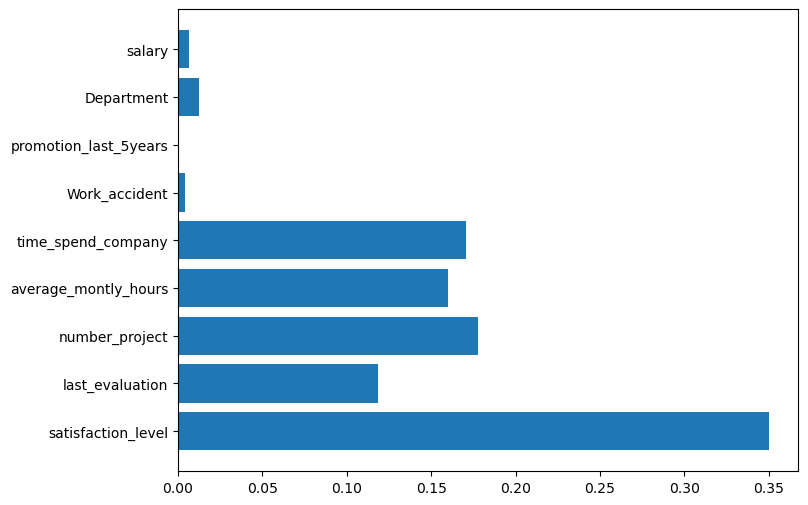

In [73]:
plt.figure(figsize=(8,6))
plt.barh(range(len(feature_list)), model.feature_importances_)
plt.yticks(np.arange(len(feature_list)), feature_list)
#y.label("Features")
plt.show()

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv =5, scoring='accuracy')

In [75]:
print('Cross-Validation score: ', scores)

Cross-Validation score:  [0.9885357  0.98280354 0.98488008 0.98592284 0.98748697]


In [76]:
Avg_Model_score = scores.mean()
print('Average Model score: ',Avg_Model_score)

Average Model score:  0.9859258248968523


In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [78]:
params = {'n_estimators':[50,100], 'max_features':['sqrt', 'log2', None]}

In [79]:
grid_search = GridSearchCV(estimator= model, param_grid= params)

In [80]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [81]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [82]:
model_new = RandomForestClassifier(max_features='sqrt', n_estimators = 100)

In [83]:
model_new.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [84]:
scores = cross_val_score(model_new, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')

In [85]:
print("Cross-validation scores: ", scores)

Cross-validation scores:  [0.9885357  0.98332465 0.98540146 0.98540146 0.98748697]


In [87]:
Avg_model_score = scores.mean()

In [88]:
print("Avergae Model Score: ", Avg_Model_score)

Avergae Model Score:  0.9859258248968523
